<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    54.234497  61.826805  51.637197  ...  167.442986  178.629874 -11.186889
      1.0    32.336680  53.435957  52.595927  ...  164.106554  150.770393  13.336161
      2.0    53.537903  73.372301  89.777203  ...  203.605480  227.032513 -23.427033
      3.0    25.261124  53.139778  26.355606  ...  139.895807  117.757882  22.137925
      4.0    92.370585  23.001003  40.921932  ...  166.387755  166.320397   0.067358
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  95.147349  82.334437  42.139397  ...  227.354008  226.782367   0.571641
      246.0  41.145821  61.756726  41.489983  ...  161.447188  155.295797   6.151391
      247.0  87.558503  54.792547  97.629389  ...  231.194687  246.538159 -15.343472
      248.0  47.191632  42.900847  90.073764  ...  180.306334  189.659785  -9.353451
      249.0  28.610254  84.259493  60.711151  ...  183.903672  184.444404  -0.540732

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    54.234497  61.826805  51.637197  ...  167.442986  178.629874 -11.186889
      1.0    32.336680  53.435957  52.595927  ...  164.106554  150.770393  13.336161
      2.0    53.537903  73.372301  89.777203  ...  203.605480  227.032513 -23.427033
      3.0    25.261124  53.139778  26.355606  ...  139.895807  117.757882  22.137925
      4.0    92.370585  23.001003  40.921932  ...  166.387755  166.320397   0.067358
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  95.147349  82.334437  42.139397  ...  227.354008  226.782367   0.571641
      246.0  41.145821  61.756726  41.489983  ...  161.447188  155.295797   6.151391
      247.0  87.558503  54.792547  97.629389  ...  231.194687  246.538159 -15.343472
      248.0  47.191632  42.900847  90.073764  ...  180.306334  189.659785  -9.353451
      249.0  28.610254  84.259493  60.711151  ...  183.903672  184.444404  -0.540732

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    54.234497  61.826805  51.637197  ...  167.442986  178.629874 -11.186889
      1.0    32.336680  53.435957  52.595927  ...  164.106554  150.770393  13.336161
      2.0    53.537903  73.372301  89.777203  ...  203.605480  227.032513 -23.427033
      3.0    25.261124  53.139778  26.355606  ...  139.895807  117.757882  22.137925
      4.0    92.370585  23.001003  40.921932  ...  166.387755  166.320397   0.067358
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  95.147349  82.334437  42.139397  ...  227.354008  226.782367   0.571641
      246.0  41.145821  61.756726  41.489983  ...  161.447188  155.295797   6.151391
      247.0  87.558503  54.792547  97.629389  ...  231.194687  246.538159 -15.343472
      248.0  47.191632  42.900847  90.073764  ...  180.306334  189.659785  -9.353451
      249.0  28.610254  84.259493  60.711151  ...  183.903672  184.444404  -0.540732

[250000 rows x 7 columns]

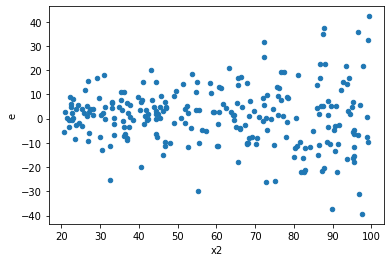

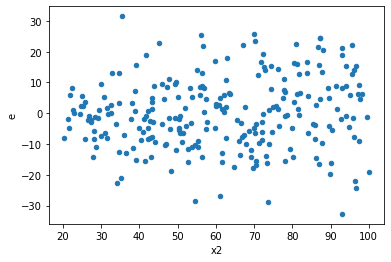

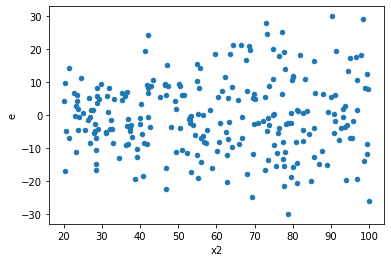

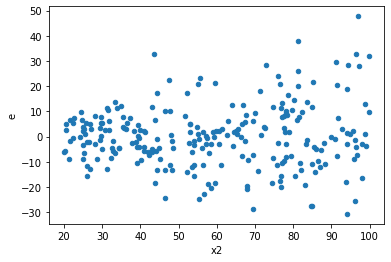

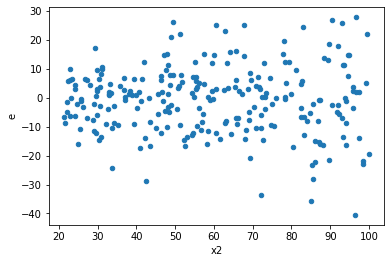

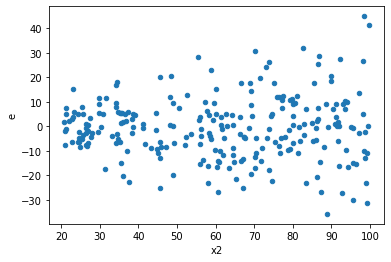

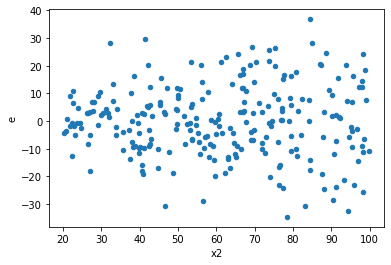

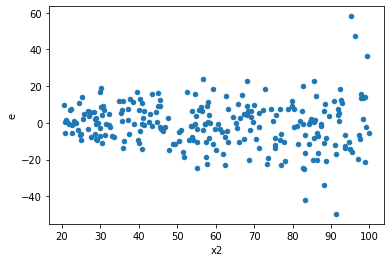

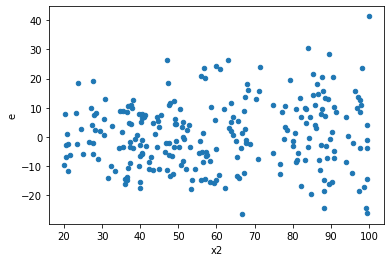

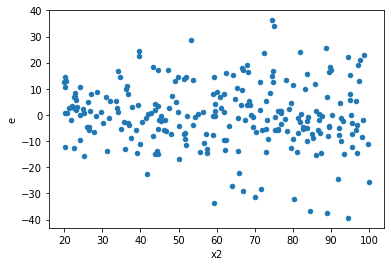

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,8400.573531854381,18714.800517436543,86.6038508438596,192.93608780862414,2.2278003336880916,0.0001028601822485875,0.9999485699088757,5.143009112429375e-05,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,6911.341841650125,19316.809864485058,71.25094682113532,199.14236973695935,2.794943486672199,7.66618864167512e-07,0.9999996166905679,3.83309432083756e-07,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,8666.432191991284,19981.692054921285,89.34466177310601,205.99682530846684,2.3056422311117277,5.214239610773497e-05,0.9999739288019461,2.6071198053867484e-05,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,4935.076865475166,15702.726930228308,50.87708108737285,161.88378278585884,3.1818606595738186,3.062222653227309e-08,0.9999999846888867,1.5311113266136545e-08,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,9145.412220052574,18924.293428778034,94.28260020672757,195.09580854410345,2.0692663133635376,0.0004098228282742866,0.9997950885858629,0.0002049114141371433,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,8022.392951343007,21791.068252078625,82.70508197260831,224.65018816575903,2.716280339824372,1.4968978294671587e-06,0.9999992515510853,7.484489147335793e-07,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,6121.791592247312,19581.62498499166,63.111253528322806,201.87242252568723,3.198675533121708,2.670057774878387e-08,0.9999999866497111,1.3350288874391936e-08,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,8293.23609005734,21925.699285528666,85.49727927894165,226.03813696421307,2.6438050294763853,2.7833602804783197e-06,0.9999986083198598,1.3916801402391599e-06,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,7493.090538903855,17397.526037260082,77.24835607117376,179.35593852845446,2.321809131617022,4.528463711261921e-05,0.9999773576814437,2.2642318556309604e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,8400.573531854381,18714.800517436543,86.6038508438596,192.93608780862414,2.2278003336880916,0.0001028601822485875,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,6911.341841650125,19316.809864485058,71.25094682113532,199.14236973695935,2.794943486672199,7.66618864167512e-07,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,8666.432191991284,19981.692054921285,89.34466177310601,205.99682530846684,2.3056422311117277,5.214239610773497e-05,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,4935.076865475166,15702.726930228308,50.87708108737285,161.88378278585884,3.1818606595738186,3.062222653227309e-08,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,9145.412220052574,18924.293428778034,94.28260020672757,195.09580854410345,2.0692663133635376,0.0004098228282742866,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,8022.392951343007,21791.068252078625,82.70508197260831,224.65018816575903,2.716280339824372,1.4968978294671587e-06,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,6121.791592247312,19581.62498499166,63.111253528322806,201.87242252568723,3.198675533121708,2.670057774878387e-08,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,8293.23609005734,21925.699285528666,85.49727927894165,226.03813696421307,2.6438050294763853,2.7833602804783197e-06,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,7493.090538903855,17397.526037260082,77.24835607117376,179.35593852845446,2.321809131617022,4.528463711261921e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    998
Reject005=1 : Homoscedasticity        2
Name: Result_test, dtype: int64